by Silvia Atika A

# Import Library dan Data

In [159]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [160]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [161]:
# Membuat Dataset DQLab listing
listings = pd.read_csv('/content/drive/MyDrive/PS Project/DQLab_listings(22Sep2022) (1).csv')
neighbourhood = pd.read_csv('/content/drive/MyDrive/PS Project/DQLab_nieghbourhood(22Sep2022).csv')
reviews = pd.read_csv('/content/drive/MyDrive/PS Project/DQLab_reviews(22Sep2022).csv')

# Business Question
1. Pada bulan dan tahun berapa daftar kegiatan persewaan paling sedikit dan paling banyak?
2. Bagaimana tren persewaan di setiap wilayah?
3. Bagaimana trend penyewaan dari 01-01-2018 sampai dengan 22-09-2022?
4. Jenis kamar apa yang paling banyak diminati?
5. Bagaimana distribusi harga listing airbnb di Singapura?


# Data Preparation

## Data Cleaning
Dapat dilihat bahwa Dataset tidak memiliki missing value. Namun, dataset memiliki kolom yang tidak dibutuhkan serta tipe data yang tidak sesuai (misal, id sebaiknya berbentuk string dibanding integer)

In [162]:
listings.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,0,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Bukit Timah,1.33432,103.78521,Private room,80,92,365
1,1,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340
2,2,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,Tampines,1.34754,103.95958,Private room,85,92,265
3,3,71903,Room 2-near Airport & EXPO,367042,Belinda,Tampines,1.34531,103.96100,Private room,85,92,365
4,4,275344,15 mins to Outram MRT Single Room,1439258,Kay,Bukit Merah,1.28836,103.81144,Private room,49,60,296


In [163]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4161 entries, 0 to 4160
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4161 non-null   int64  
 1   id                4161 non-null   int64  
 2   name              4161 non-null   object 
 3   host_id           4161 non-null   int64  
 4   host_name         4161 non-null   object 
 5   neighbourhood     4161 non-null   object 
 6   latitude          4161 non-null   float64
 7   longitude         4161 non-null   float64
 8   room_type         4161 non-null   object 
 9   price             4161 non-null   int64  
 10  minimum_nights    4161 non-null   int64  
 11  availability_365  4161 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 390.2+ KB


In [164]:
# menghapus kolom Unnamed: 0
listings.drop(['Unnamed: 0'], axis=1, inplace=True)

# mangganti tipe data
listings["id"] = listings["id"].astype("int")
listings["host_id"] = listings["host_id"].astype("int")

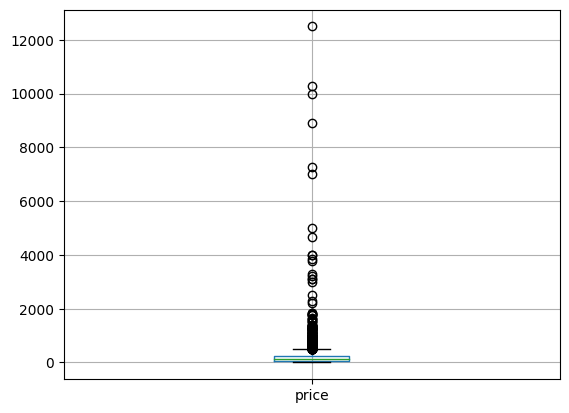

In [165]:
# Cek outlier dengan boxplot
listings.boxplot(column='price')
plt.show()

In [166]:
# Melihat data price, dapat dilihat Max terlalu jauh dengan data lainnya
listings['price'].describe()

count     4161.000000
mean       214.505167
std        454.921421
min          0.000000
25%         60.000000
50%        120.000000
75%        235.000000
max      12494.000000
Name: price, dtype: float64

In [167]:
# Membersihkan ouliers
# ambil quantile 1 dan 3 dari data price
q1 = listings['price'].quantile(0.25)
q3 = listings['price'].quantile(0.75)

# Hitung Interquartile range (IQR), upper, dan lower limit untuk outliers
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

In [168]:
# Filter outlier
listings = listings[listings['price'] > lower_limit]
listings = listings[listings['price'] < upper_limit]

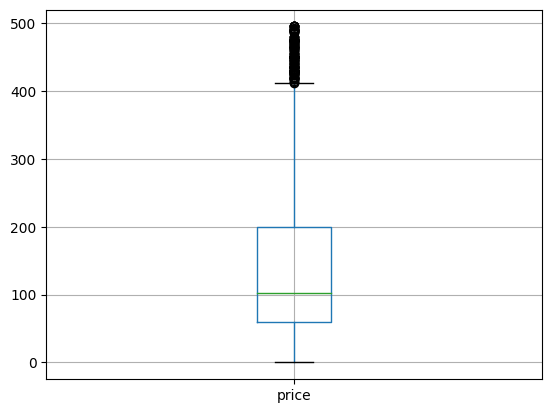

In [169]:
listings.boxplot(column='price')
plt.show()

In [170]:
listings['price'].describe()

count    3839.000000
mean      144.593644
std       110.778563
min         0.000000
25%        59.000000
50%       103.000000
75%       200.000000
max       495.000000
Name: price, dtype: float64

In [171]:
listings.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Bukit Timah,1.33432,103.78521,Private room,80,92,365
1,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340
2,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,Tampines,1.34754,103.95958,Private room,85,92,265
3,71903,Room 2-near Airport & EXPO,367042,Belinda,Tampines,1.34531,103.96100,Private room,85,92,365
4,275344,15 mins to Outram MRT Single Room,1439258,Kay,Bukit Merah,1.28836,103.81144,Private room,49,60,296


In [172]:
neighbourhood.head()

,Unnamed: 0,neighbourhood_group,neighbourhood
0,0,Central Region,Bishan
1,1,Central Region,Bukit Merah
2,2,Central Region,Bukit Timah
3,3,Central Region,Downtown Core
4,4,Central Region,Geylang


In [173]:
neighbourhood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           55 non-null     int64 
 1   neighbourhood_group  55 non-null     object
 2   neighbourhood        55 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.4+ KB


In [174]:
# menghapus kolom Unnamed: 0
neighbourhood.drop(['Unnamed: 0'], axis=1, inplace=True)

In [175]:
reviews.head()

,Unnamed: 0,listing_id,date
0,28,71609,2018-07-14
1,29,71609,2019-01-06
2,30,71609,2019-07-27
3,31,71609,2019-08-11
4,32,71609,2019-09-07


In [176]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49695 entries, 0 to 49694
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  49695 non-null  int64 
 1   listing_id  49695 non-null  int64 
 2   date        49695 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [177]:
# menghapus kolom Unnamed: 0
reviews.drop(['Unnamed: 0'], axis=1, inplace=True)

# mangganti tipe data
reviews["listing_id"] = reviews["listing_id"].astype("int")
reviews['date'] = pd.to_datetime(reviews.date)

# merubah nama kolom untuk mempermudah merge
reviews.rename(columns = {'listing_id':'id'}, inplace = True)

# membuat kolom bulantahun, bulan, tahun
reviews["bulantahun"] = pd.to_datetime(reviews['date'], format=("%Y %b")).dt.strftime("%Y %b")
reviews["bulan"] = pd.to_datetime(reviews['date'], format=("%B")).dt.strftime("%B")
reviews["tahun"] = pd.to_datetime(reviews['date'], format=("%Y")).dt.strftime("%Y")

## Merge Data

In [178]:
df_merge = listings.merge(reviews, on='id')
df_merge.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,date,bulantahun,bulan,tahun
0,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2018-07-14,2018 Jul,July,2018
1,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-01-06,2019 Jan,January,2019
2,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-07-27,2019 Jul,July,2019
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-08-11,2019 Aug,August,2019
4,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-09-07,2019 Sep,September,2019


In [179]:
df_merge = df_merge.merge(neighbourhood, on='neighbourhood')
df_merge.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,date,bulantahun,bulan,tahun,neighbourhood_group
0,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2018-07-14,2018 Jul,July,2018,East Region
1,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-01-06,2019 Jan,January,2019,East Region
2,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-07-27,2019 Jul,July,2019,East Region
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-08-11,2019 Aug,August,2019,East Region
4,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-09-07,2019 Sep,September,2019,East Region


In [180]:
# Cek apakah ada data duplikat
df_merge.duplicated().tolist().count(True)

# Hapus duplikat
df_merge.drop_duplicates(inplace=True)

# Cek lagi apakah masih ada duplikat
df_merge.duplicated().tolist().count(True)

0

In [181]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47751 entries, 0 to 48424
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   47751 non-null  int64         
 1   name                 47751 non-null  object        
 2   host_id              47751 non-null  int64         
 3   host_name            47751 non-null  object        
 4   neighbourhood        47751 non-null  object        
 5   latitude             47751 non-null  float64       
 6   longitude            47751 non-null  float64       
 7   room_type            47751 non-null  object        
 8   price                47751 non-null  int64         
 9   minimum_nights       47751 non-null  int64         
 10  availability_365     47751 non-null  int64         
 11  date                 47751 non-null  datetime64[ns]
 12  bulantahun           47751 non-null  object        
 13  bulan                47751 non-

# Analysis

In [182]:
df_merge.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,date,bulantahun,bulan,tahun,neighbourhood_group
0,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2018-07-14,2018 Jul,July,2018,East Region
1,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-01-06,2019 Jan,January,2019,East Region
2,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-07-27,2019 Jul,July,2019,East Region
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-08-11,2019 Aug,August,2019,East Region
4,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340,2019-09-07,2019 Sep,September,2019,East Region


## Analisis Tren Persewaan

In [453]:
sewa_blnthn = df_merge.groupby('bulantahun')['bulantahun'].count()
df_sewa_blnthn=pd.DataFrame({'bulantahun':sewa_blnthn.index, 'count':sewa_blnthn.values})
df_sewa_blnthn.head()

,bulantahun,count
0,2018 Apr,508
1,2018 Aug,677
2,2018 Dec,914
3,2018 Feb,413
4,2018 Jan,438


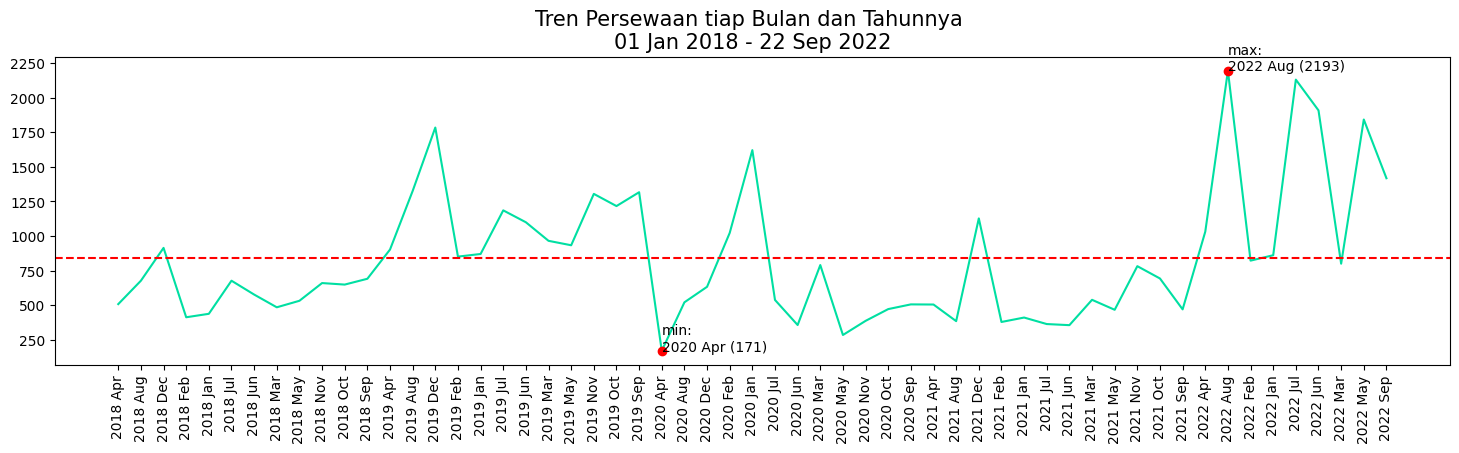

In [463]:
x = df_sewa_blnthn['bulantahun']
y = df_sewa_blnthn['count'].tolist()

plt.subplots(figsize=(18, 4))
plt.plot(x, y, color='#00DFA2')

plt.xticks(fontsize=10, rotation=90)
plt.title('Tren Persewaan tiap Bulan dan Tahunnya \n01 Jan 2018 - 22 Sep 2022', fontsize=15)

# Annotate Max
ymax = max(y)
xpos = y.index(ymax)
xmax = x[xpos]
plt.plot(xmax, ymax, 'ro')
plt.text(xmax, ymax+3, 'max:' + '\n'+str(xmax)+ ' (' + str(ymax) + ')')

# Annotate Min
ymin = min(y)
xpos = y.index(ymin)
xmin = x[xpos]
plt.plot(xmin, ymin, 'ro')
plt.text(xmin, ymin, 'min:' + '\n'+str(xmin)+ ' (' + str(ymin) + ')')

# Average Line
plt.axhline(y=np.nanmean(y),color='red',linestyle='--', label='Avg')

plt.show()

In [455]:
sewa_bln = df_merge.groupby(['bulan'])['bulan'].count()
df_sewa_bln=pd.DataFrame({'bulan':sewa_bln.index, 'count':sewa_bln.values})

df_sewa_bln["angka"] = pd.to_datetime(df_sewa_bln.bulan, format='%B', errors='coerce').dt.month
df_sewa_bln = df_sewa_bln.sort_values(by="angka")

df_sewa_bln.head()

,bulan,count,angka
4,January,4200,1
3,February,3487,2
7,March,3579,3
0,April,3117,4
8,May,4058,5


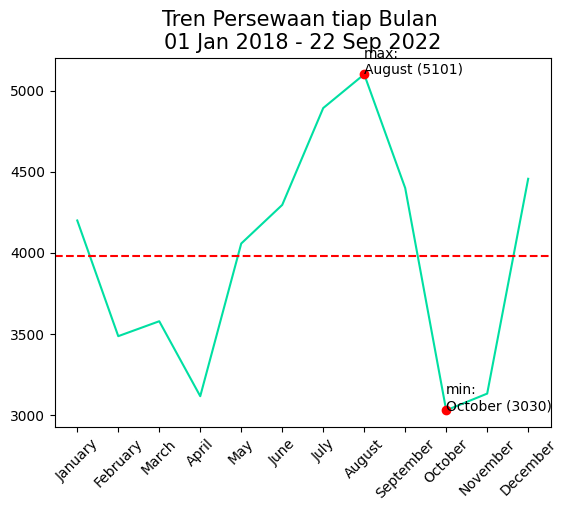

In [464]:
x = df_sewa_bln['bulan'].tolist()
y = df_sewa_bln['count'].tolist()

plt.subplots()
plt.plot(x, y, color='#00DFA2')

plt.xticks(fontsize=10, rotation=45)
plt.title('Tren Persewaan tiap Bulan \n01 Jan 2018 - 22 Sep 2022', fontsize=15)

# Annotate Max
ymax = max(y)
xpos = y.index(ymax)
xmax = x[xpos]
plt.plot(xmax, ymax, 'ro')
plt.text(xmax, ymax+3, 'max:' + '\n'+str(xmax)+ ' (' + str(ymax) + ')')

# Annotate Min
ymin = min(y)
xpos = y.index(ymin)
xmin = x[xpos]
plt.plot(xmin, ymin, 'ro')
plt.text(xmin, ymin, 'min:' + '\n'+str(xmin)+ ' (' + str(ymin) + ')')

# Average Line
plt.axhline(y=np.nanmean(y),color='red',linestyle='--', label='Avg')

plt.show()

In [457]:
sewa_thn = df_merge.groupby('tahun')['tahun'].count()
df_sewa_thn=pd.DataFrame({'tahun':sewa_thn.index, 'count':sewa_thn.values})
df_sewa_thn.head()

,tahun,count
0,2018,7221
1,2019,13749
2,2020,7302
3,2021,6478
4,2022,13001


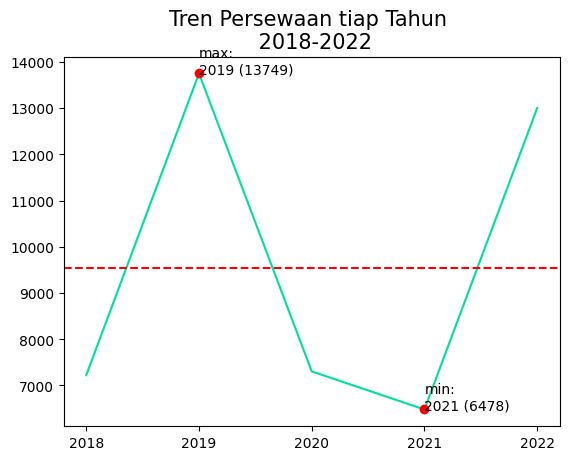

In [465]:
x = df_sewa_thn['tahun']
y = df_sewa_thn['count'].tolist()

plt.subplots()
plt.plot(x, y, color='#00DFA2')

plt.xticks(fontsize=10)
plt.title('Tren Persewaan tiap Tahun \n 2018-2022', fontsize=15)

# Annotate Max
ymax = max(y)
xpos = y.index(ymax)
xmax = x[xpos]
plt.plot(xmax, ymax, 'ro')
plt.text(xmax, ymax+3, 'max:' + '\n'+str(xmax)+ ' (' + str(ymax) + ')')

# Annotate Min
ymin = min(y)
xpos = y.index(ymin)
xmin = x[xpos]
plt.plot(xmin, ymin, 'ro')
plt.text(xmin, ymin, 'min:' + '\n'+str(xmin)+ ' (' + str(ymin) + ')')

# Average Line
plt.axhline(y=np.nanmean(y),color='red',linestyle='--', label='Avg')

plt.show()

## Analysis Wilayah

In [196]:
df_wilayah = df_merge.groupby('neighbourhood_group').agg(count=('neighbourhood_group','count')).sort_values(by=['count'], ascending=False).reset_index()
df_wilayah

,neighbourhood_group,count
0,North Region,22660
1,Central Region,16898
2,West Region,5195
3,East Region,1990
4,North-East Region,1008


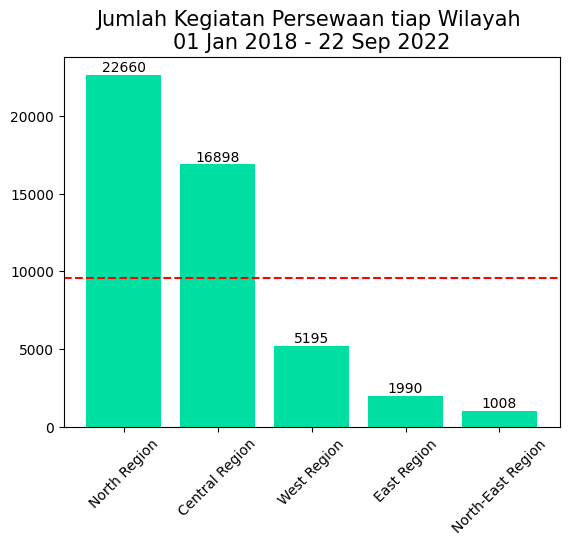

In [466]:
x = df_wilayah['neighbourhood_group'].tolist()
y = df_wilayah['count'].tolist()

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha="center", va="bottom")

# making the bar chart on the data
plt.bar(x, y, color='#00DFA2')

# calling the function to add value labels
addlabels(x, y)

# giving title to the plot
plt.title('Jumlah Kegiatan Persewaan tiap Wilayah \n01 Jan 2018 - 22 Sep 2022', fontsize=15)
plt.xticks(fontsize=10, rotation=45)

# Average Line
plt.axhline(y=np.nanmean(y),color='red',linestyle='--', label='Avg')

# visualizing the plot
plt.show()

In [198]:
# df_tren_wilayah = df_merge.groupby(['neighbourhood_group','tahun']).agg(count=('neighbourhood_group','count')).sort_values(by=['count'], ascending=False).reset_index()
# df_tren_wilayah.head()
df_tren_wilayah = df_merge[['neighbourhood_group', 'date']].copy()
df_tren_wilayah.sort_values('date', inplace=True)
df_tren_wilayah.head()

,neighbourhood_group,date
77,East Region,2018-01-01
7902,Central Region,2018-01-01
7806,Central Region,2018-01-01
13004,Central Region,2018-01-01
40920,West Region,2018-01-01


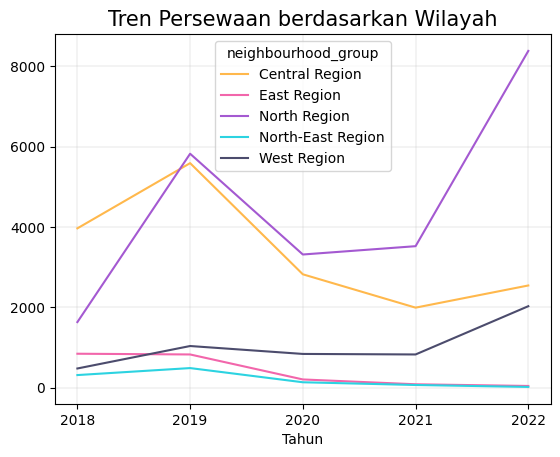

In [467]:
fig, ax = plt.subplots()
df_tren_wilayah.groupby(
    [df_tren_wilayah.date.dt.year, df_tren_wilayah.neighbourhood_group]).count()['date'].unstack().plot(ax=ax,
                                                                                                        color=['#FFB84C','#F266AB', '#A459D1','#2CD3E1','#4C4C6D'])

plt.title('Tren Persewaan berdasarkan Wilayah', fontsize=15)
plt.xticks(df_tren_wilayah.date.dt.year.unique().tolist())
plt.xlabel("Tahun")

plt.grid(linewidth=0.20)
plt.show()

In [396]:
harga_wilayah = df_merge[['neighbourhood_group', 'neighbourhood','price']].copy()
harga_wilayah = harga_wilayah.drop_duplicates()
harga_wilayah.head()

,neighbourhood_group,neighbourhood,price
0,East Region,Tampines,145
10,East Region,Tampines,85
37,East Region,Tampines,184
41,East Region,Tampines,42
77,East Region,Tampines,83


In [397]:
harga_wilayah = harga_wilayah.groupby(['neighbourhood_group','neighbourhood']).mean()['price'].reset_index(name='price')
# harga_wilayah.sort_values('neighbourhood_group').head()

In [398]:
harga_wilayah_1 = harga_wilayah.drop('neighbourhood', axis=1)
harga_wilayah_1 = harga_wilayah_1.groupby(['neighbourhood_group']).mean().round(2)['price'].reset_index()
harga_wilayah_1 = harga_wilayah_1.sort_values('price', ascending=False)
harga_wilayah_1

,neighbourhood_group,price
0,Central Region,191.00
1,East Region,147.00
2,North Region,114.34
4,West Region,113.19
3,North-East Region,91.74


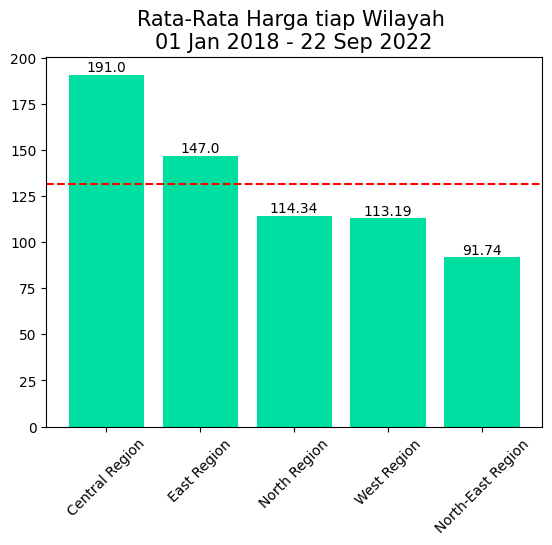

In [468]:
x = harga_wilayah_1['neighbourhood_group'].tolist()
y = harga_wilayah_1['price'].tolist()

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha="center", va="bottom")

# making the bar chart on the data
plt.bar(x, y, color = '#00DFA2')

# calling the function to add value labels
addlabels(x, y)

# giving title to the plot
plt.title('Rata-Rata Harga tiap Wilayah \n01 Jan 2018 - 22 Sep 2022', fontsize=15)
plt.xticks(fontsize=10, rotation=45)

# Average Line
plt.axhline(y=np.nanmean(y),color='red',linestyle='--', label='Avg')

# visualizing the plot
plt.show()

In [400]:
harga_wilayah_2 = harga_wilayah.groupby(['neighbourhood_group']).count()['neighbourhood'].reset_index()
neighbourhood_total = neighbourhood.groupby(['neighbourhood_group']).count()['neighbourhood'].reset_index()
harga_wilayah_2 = harga_wilayah_2.merge(neighbourhood_total, on='neighbourhood_group')
harga_wilayah_2['neighbourhood_not'] = harga_wilayah_2['neighbourhood_y'] - harga_wilayah_2['neighbourhood_x']
harga_wilayah_2 = harga_wilayah_2.rename(
    columns={'neighbourhood_x': 'neighbourhood', 'neighbourhood_y': 'neighbourhood_total'})
harga_wilayah_2 = harga_wilayah_2.sort_values('neighbourhood', ascending=False)
harga_wilayah_2

,neighbourhood_group,neighbourhood,neighbourhood_total,neighbourhood_not
0,Central Region,19,22,3
4,West Region,7,12,5
2,North Region,6,8,2
3,North-East Region,6,7,1
1,East Region,3,6,3


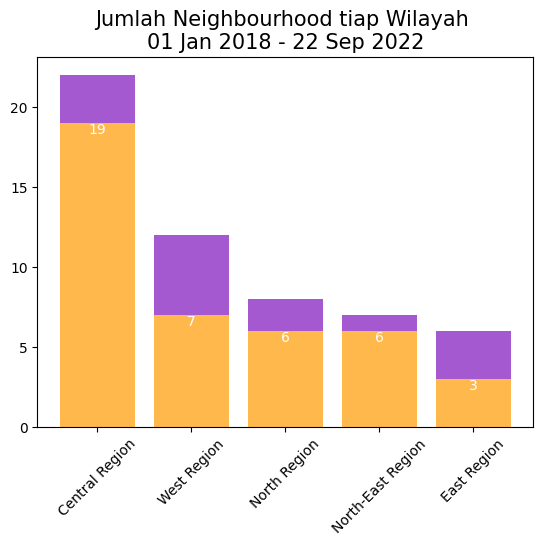

In [486]:
x = harga_wilayah_2['neighbourhood_group'].tolist()
y1 = harga_wilayah_2['neighbourhood'].tolist()
y2 = harga_wilayah_2['neighbourhood_not'].tolist()

def addlabels(x,y,va):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha="center", va=va, color='w')

# making the bar chart on the data
plt.bar(x, y1, color='#FFB84C')
plt.bar(x, y2, bottom=y1, color='#A459D1')

# calling the function to add value labels
addlabels(x, y1, 'top')
# addlabels(x, y2, 'top')

# giving title to the plot
plt.title('Jumlah Neighbourhood tiap Wilayah \n01 Jan 2018 - 22 Sep 2022', fontsize=15)
plt.xticks(fontsize=10, rotation=45)

# Average Line
# plt.axhline(y=np.nanmean(y1),color='red',linestyle='--', label='Avg')

# visualizing the plot
plt.show()

## Analysis Room Type

In [402]:
type_room = df_merge.groupby('room_type')['date'].count()
df_type_room = pd.DataFrame(type_room).reset_index()
df_type_room = df_type_room.sort_values('date', ascending=False)
df_type_room

,room_type,date
0,Entire home/apt,32758
2,Private room,12338
1,Hotel room,1926
3,Shared room,729


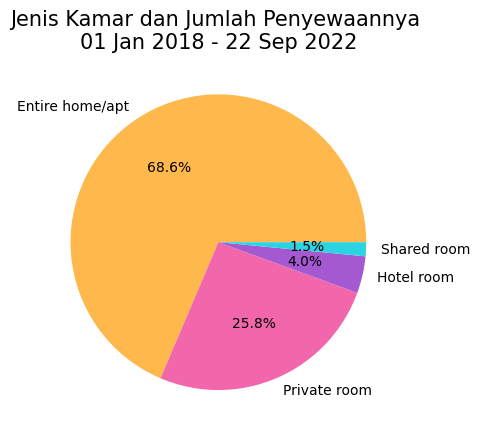

In [470]:
plt.pie(df_type_room['date'], labels=df_type_room['room_type'], autopct='%1.1f%%', colors=['#FFB84C','#F266AB', '#A459D1','#2CD3E1','#4C4C6D'])
plt.title('Jenis Kamar dan Jumlah Penyewaannya \n01 Jan 2018 - 22 Sep 2022', fontsize=15)
plt.show()

In [404]:
df_room_price = df_merge[['room_type', 'price']]
df_room_price = df_room_price.groupby(['room_type']).mean().round(2)['price'].reset_index()
df_room_price = df_room_price.sort_values('price')
df_room_price

,room_type,price
3,Shared room,50.81
0,Entire home/apt,89.27
2,Private room,104.85
1,Hotel room,115.86


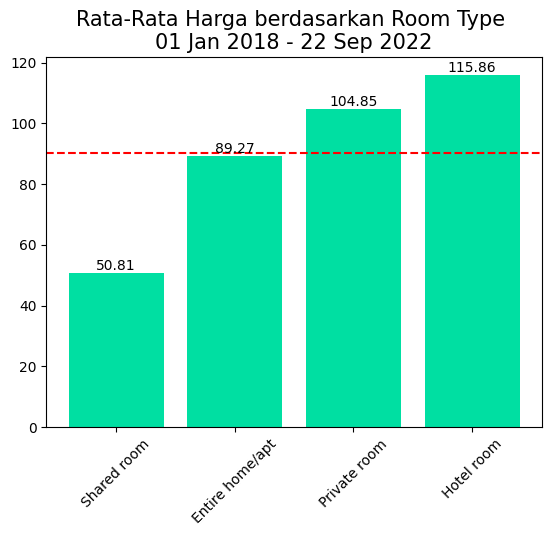

In [471]:
x = df_room_price['room_type'].tolist()
y = df_room_price['price'].tolist()

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha="center", va="bottom")

# making the bar chart on the data
plt.bar(x, y, color = '#00DFA2')

# calling the function to add value labels
addlabels(x, y)

# giving title to the plot
plt.title('Rata-Rata Harga berdasarkan Room Type \n01 Jan 2018 - 22 Sep 2022', fontsize=15)
plt.xticks(fontsize=10, rotation=45)

# Average Line
plt.axhline(y=np.nanmean(y),color='red',linestyle='--', label='Avg')

# visualizing the plot
plt.show()

In [408]:
wilayah_room = df_merge[['neighbourhood', 'room_type']].copy()
wilayah_room = wilayah_room.merge(neighbourhood, on='neighbourhood')
wilayah_room = wilayah_room.groupby(['neighbourhood_group', 'room_type']).size().reset_index(name='counts')
wilayah_room.head()

,neighbourhood_group,room_type,counts
0,Central Region,Entire home/apt,6076
1,Central Region,Hotel room,1589
2,Central Region,Private room,8522
3,Central Region,Shared room,711
4,East Region,Entire home/apt,519


In [472]:
pivot = pd.pivot_table(data=wilayah_room, index=['neighbourhood_group'], columns=['room_type'], values='counts')
pivot = pivot.sort_values('Entire home/apt', ascending=False)
pivot

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group,,,,
North Region,21349.0,337.0,962.0,12.0
Central Region,6076.0,1589.0,8522.0,711.0
West Region,4550.0,NaN,644.0,1.0
East Region,519.0,NaN,1471.0,NaN
North-East Region,264.0,NaN,739.0,5.0


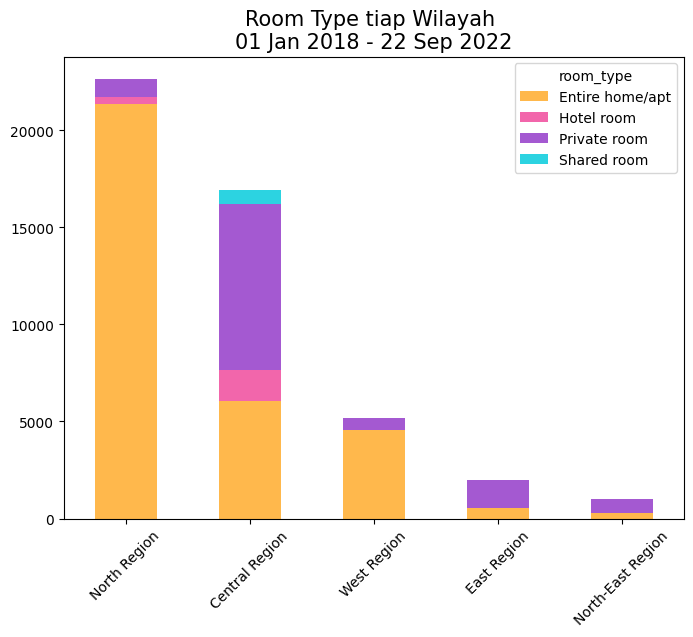

In [474]:
ax = pivot.plot.bar(stacked=True, figsize=(8,6),color=['#FFB84C','#F266AB', '#A459D1','#2CD3E1','#4C4C6D'])
plt.title('Room Type tiap Wilayah \n01 Jan 2018 - 22 Sep 2022', fontsize=15)
plt.xticks(fontsize=10, rotation=45)
plt.xlabel('')
plt.show()

## Distribusi Harga

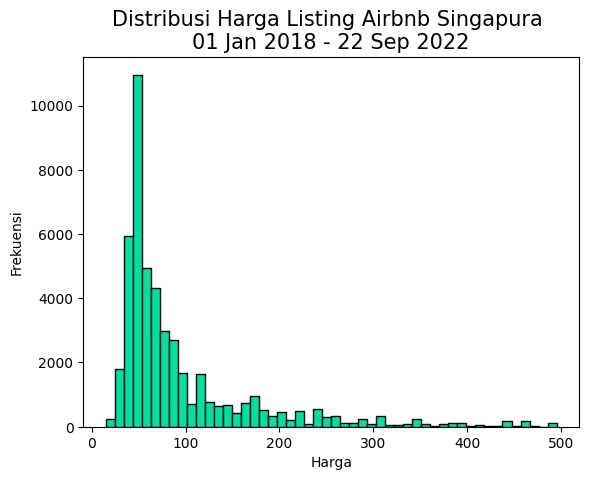

In [482]:
# Membuat histogram harga listing
plt.hist(df_merge['price'], bins=50, color = '#00DFA2', edgecolor='black')

# Menambahkan label sumbu x dan y
plt.xlabel('Harga')
plt.ylabel('Frekuensi')

# Menambahkan judul
plt.title('Distribusi Harga Listing Airbnb Singapura \n01 Jan 2018 - 22 Sep 2022', fontsize=15)

# Menampilkan plot
plt.show()


In [483]:
catatan = df_merge['price'].describe()
catatan

count    47751.000000
mean        93.780842
std         80.016078
min         15.000000
25%         46.000000
50%         62.000000
75%        106.000000
max        495.000000
Name: price, dtype: float64

In [484]:
df_merge['price'].median()

62.0